In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv("CV folder/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

## Data Cleaning

In [4]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
data.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
new_data = data.drop(["area_type", "availability", "society", "balcony"], axis=1)
new_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
new_data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
new_data.dropna(inplace=True)

In [9]:
new_data.shape

(13246, 5)

In [10]:
new_data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Feature Engineering

In [11]:
new_data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
new_data["bhk"] = new_data["size"].apply(lambda x : int(x.split(' ')[0]))
new_data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
new_data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
new_data[~new_data['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [16]:
def convert_total_sqft_to_float(x):
    num = x.split('-')
    if len(num) == 2:
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_total_sqft_to_float("2025 - 2031")

2028.0

In [18]:
new_data["total_sqft"] = new_data["total_sqft"].apply(convert_total_sqft_to_float)
new_data = new_data[new_data.total_sqft.notnull()]
new_data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
new_data["price_per_square_feet"] = (new_data["price"]*100000)/ new_data["total_sqft"]
new_data.head()

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
new_data_ = new_data.copy()

In [21]:
new_data_.location = new_data_.location.apply(lambda x : x.strip())

In [22]:
location_state = new_data_.location.value_counts()
location_state

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [23]:
len(location_state[location_state<=10])

1047

In [24]:
other_location = location_state[location_state<=10]

In [25]:
new_data_.location = new_data_.location.apply(lambda x : 'others' if x in other_location else x)

In [26]:
len(new_data_.location.unique())

241

In [27]:
new_data_.describe()

,total_sqft,bath,price,bhk,price_per_square_feet
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
len(new_data_[new_data_.total_sqft/new_data_.bhk<300])

744

In [29]:
new_data_2 = new_data_[~(new_data_.total_sqft/new_data_.bhk<300)]
new_data_2.shape

(12456, 7)

In [30]:
def remove_outliers(new_data_2):
    new_df = pd.DataFrame()
    for key, df in new_data_2.groupby('location'):
        m = np.mean(df.price_per_square_feet)
        sd  = np.std(df.price_per_square_feet)
        reduced_df = df[(df.price_per_square_feet>(m-sd)) & (df.price_per_square_feet<=(m+sd))]
        new_df = pd.concat([new_df, reduced_df], ignore_index=True)
    return new_df

In [31]:
new_data_3 = remove_outliers(new_data_2)
new_data_3.shape

(10242, 7)

In [32]:
def plot_scatter_graph(data, location):
    bhk2 = data[(data.location==location)&(data.bhk==2)]
    bhk3 = data[(data.location==location)&(data.bhk==3)]
    #plt.figure(figsize=(10,7))
    matplotlib.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', marker='*', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker='+', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

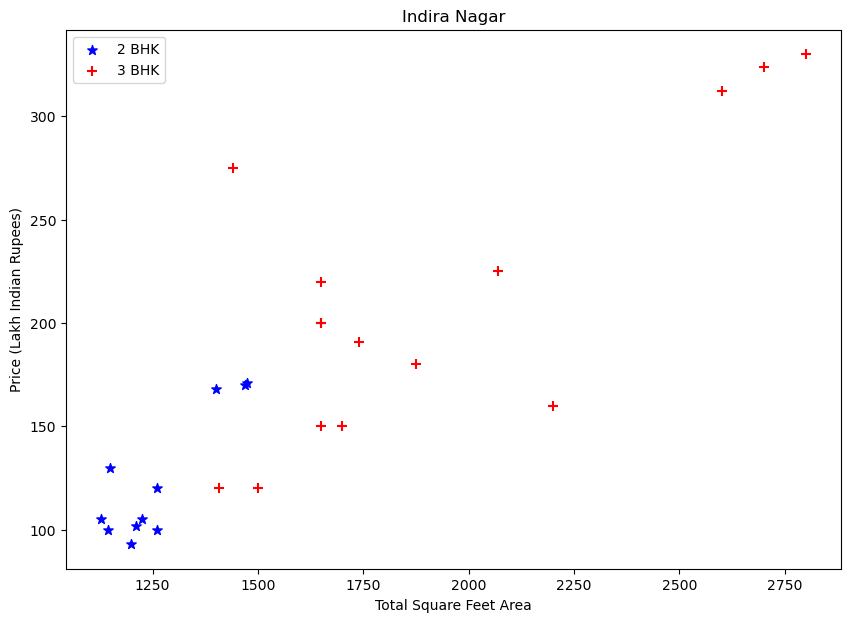

In [33]:
plot_scatter_graph(new_data_3, "Indira Nagar")

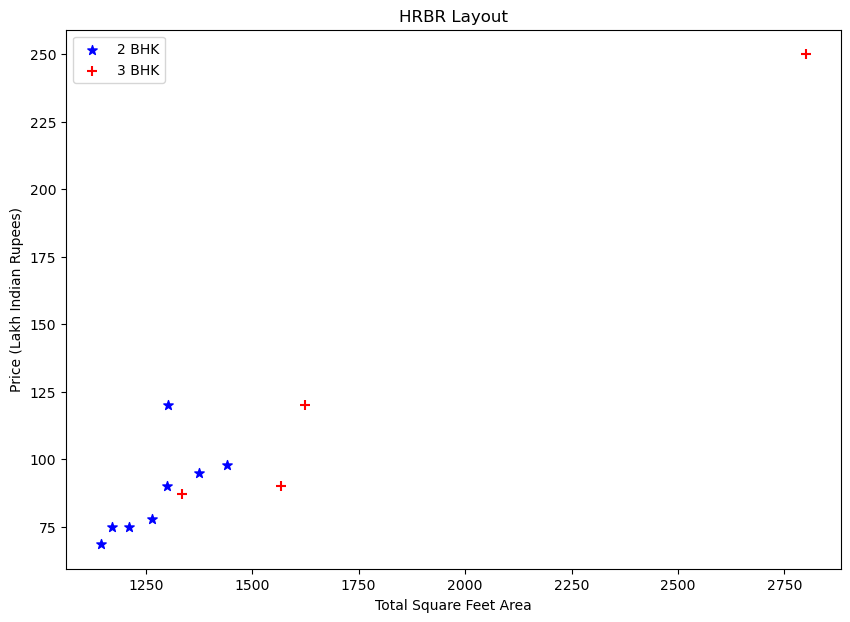

In [34]:
plot_scatter_graph(new_data_3, "HRBR Layout")

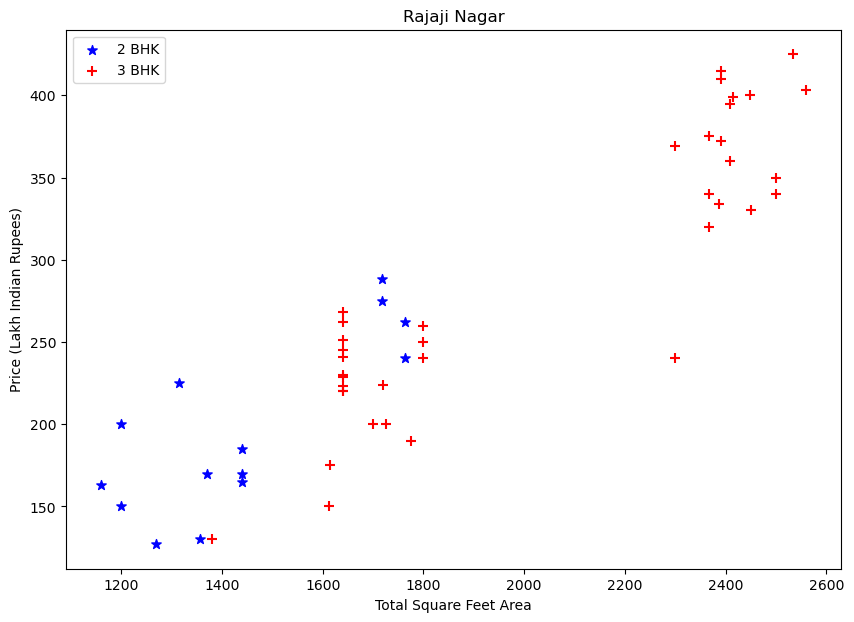

In [35]:
plot_scatter_graph(new_data_3, "Rajaji Nagar")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_square_feet),
                'std': np.std(bhk_df.price_per_square_feet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_square_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [37]:
new_data_4 = remove_bhk_outliers(new_data_3)
new_data_4.shape

(7317, 7)

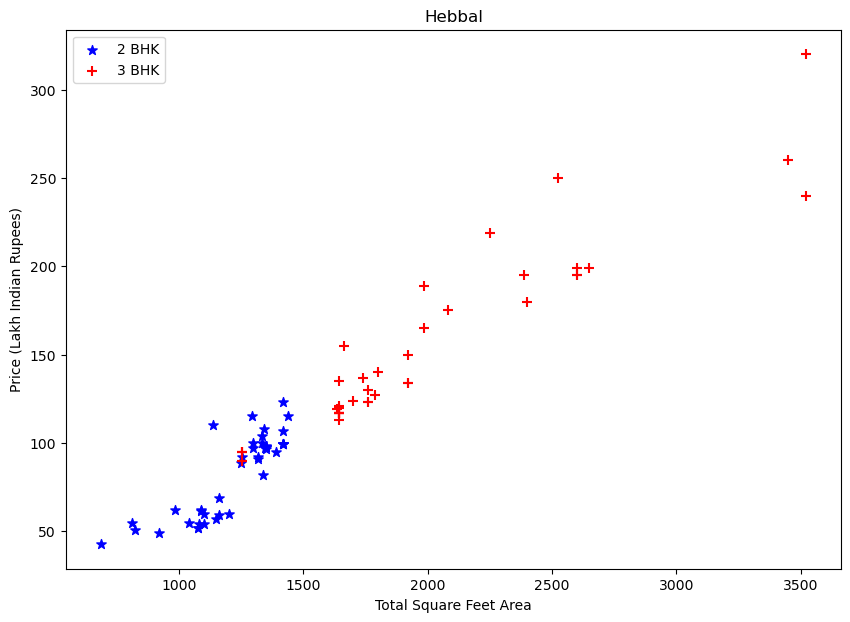

In [38]:
plot_scatter_graph(new_data_4, "Hebbal")

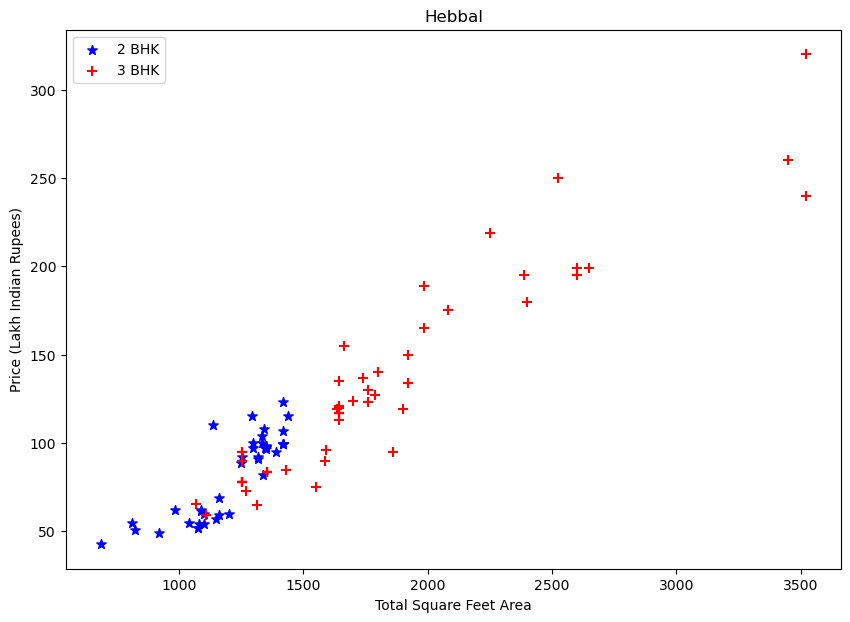

In [39]:
plot_scatter_graph(new_data_3, "Hebbal")

Text(0, 0.5, 'Count')

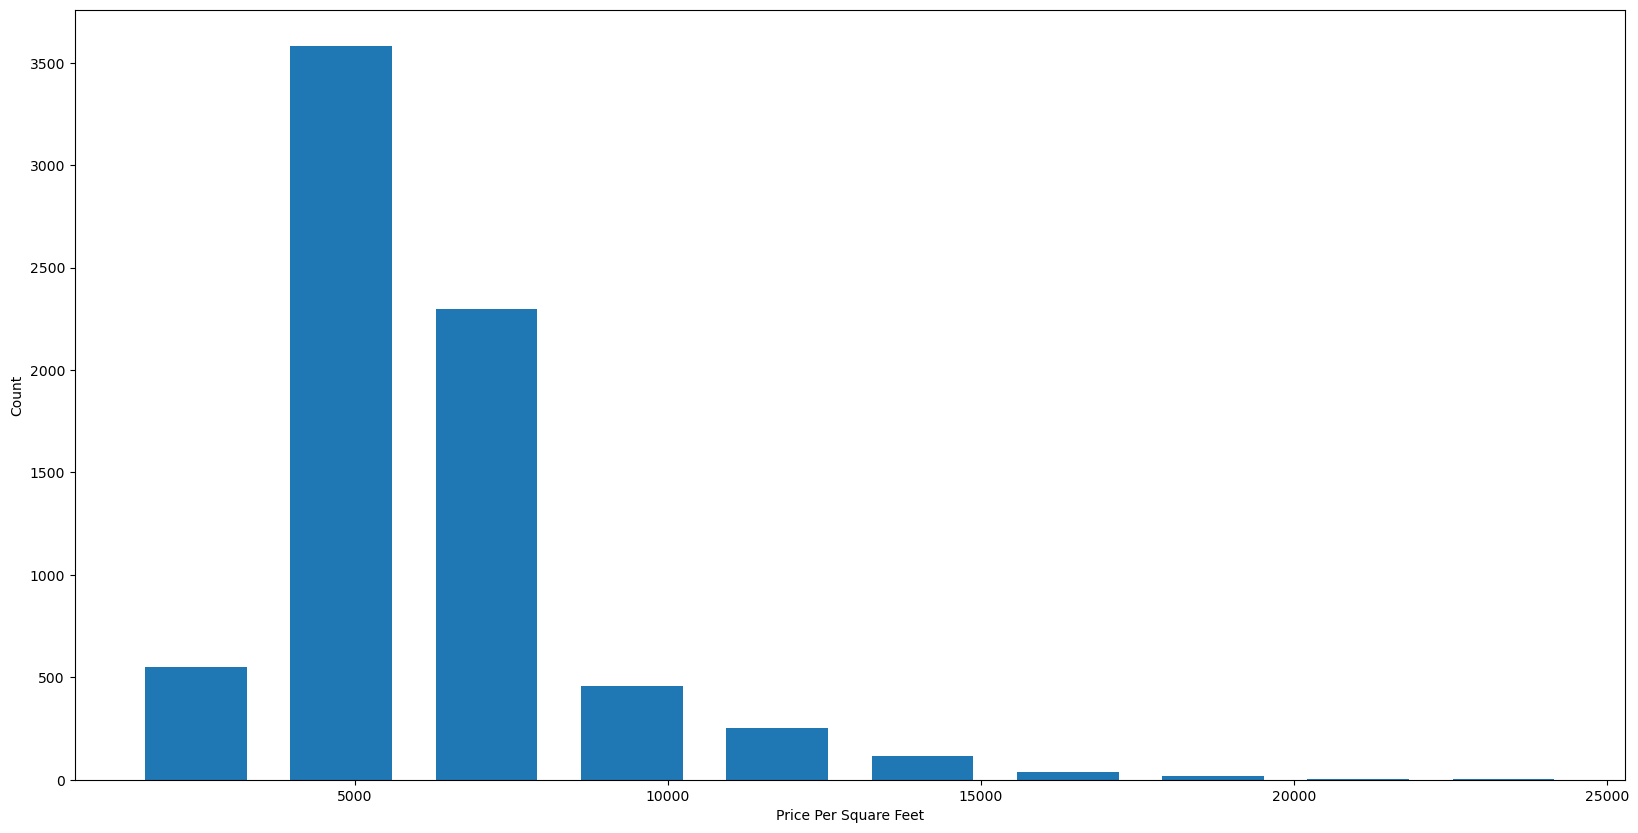

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(new_data_4.price_per_square_feet,rwidth=0.7)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
new_data_4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
new_data_4[new_data_4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

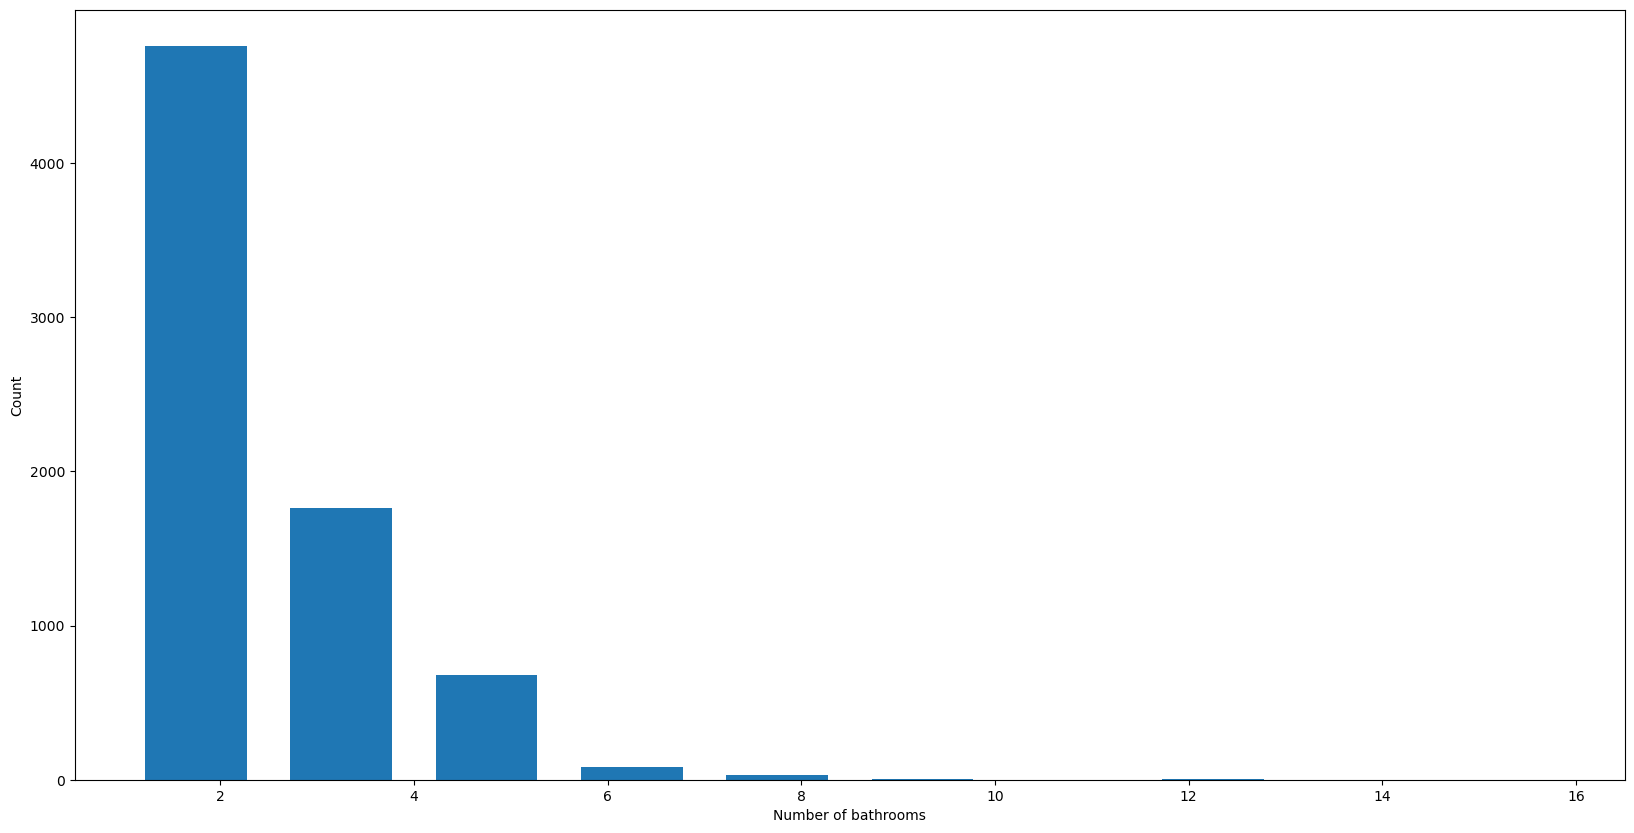

In [43]:
plt.hist(new_data_4.bath,rwidth=0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:
new_data_4[new_data_4.bath > new_data_4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
new_data_5 = new_data_4[new_data_4.bath <= new_data_4.bhk+2]
new_data_5.shape

(7313, 7)

In [46]:
new_data_6 = new_data_5.drop(["size", "price_per_square_feet"], axis=1)
new_data_6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Converting categorical data to numbers

In [47]:
new_data_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 10241
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7313 non-null   object 
 1   total_sqft  7313 non-null   float64
 2   bath        7313 non-null   float64
 3   price       7313 non-null   float64
 4   bhk         7313 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 342.8+ KB


In [48]:
dummies = pd.get_dummies(new_data_6.location)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
new_data_7 = pd.concat([new_data_6, dummies.drop("others", axis=1)], axis=1)
new_data_7.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
new_data_7.drop("location", axis=1, inplace=True)

In [51]:
new_data_7.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train the Model

In [52]:
X = new_data_7.drop("price", axis=1)
y = new_data_7.price

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.877154763053506

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(model, X, y, cv=cv)

array([0.86801733, 0.84558034, 0.83182627, 0.83917255, 0.86424179])

In [56]:
np.mean(cross_val_score(model, X, y, cv=cv))

0.8497676559572257

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def hyperparameter_tuning(X, y):
    model = algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [None, 1,2]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    
    for model_name, mp in model.items():
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        grid = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        grid.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [58]:
hyperparameter_tuning(X, y)

C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate

,model,best_score,best_params
0,linear_regression,0.849768,{'n_jobs': None}
1,lasso,0.701200,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.729533,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


  ## Test the Model

In [59]:
def price_prediction(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model.predict([x])[0]

In [60]:
price_prediction("1st Phase JP Nagar", 1000, 2, 2)

C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.31115448888714

In [61]:
price_prediction("1st Phase JP Nagar", 1000, 3, 2)

C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.79239275605192

In [62]:
price_prediction("Indira Nagar", 1000, 2, 2)

C:\Users\priya\Machine Learning\project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.96567171467865

## Exporting Model

In [88]:
import pickle

with open("real_estate_price_prediction.pickel", 'wb') as file:
    pickle.dump(model, file)

In [89]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", 'w') as json_file:
    json_file.write(json.dumps(columns))